In [1]:
using Random
using Distributions
using FFTW
using LinearAlgebra 
using Arpack 
using Plots

In [2]:
#L=100;  #system size
sigma=0.1; 
theta=0.5;  #the twist
Nreal=1000;  #number of samples 

tk(n,sig,ll,th)=-sign(cos(2.0*pi*n/ll+th/ll))*abs(cos(2.0*pi*n/ll+th/ll))^sig; #k-space Hamiltonian

In [13]:
ws=0.05; #increament of disorder strength at each loop 
wm=0.5;  #maximum disorder strength 
ls=100;    #increament of system size
Lm=500;  #maximum system size


#Random.seed!(234) #setting the seed 

W=zeros(Int(floor(wm/ws)));

for n in 1:Int(floor(wm/ws))   #loop for creating array of different disorder strengths
    W[n]=n*ws   
end 

IPRA=zeros(Int(floor(wm/ws)),Int(floor(Lm/ls)))

for l in 1:Int(floor(Lm/ls))

    L=l*ls

    IPRa=zeros(Int(floor(wm/ws)));

    for dn in 1:Int(floor(wm/ws))

        dis=Normal(0.0, W[dn])

        En=zeros(Complex{Float64},Nreal);
        Evec=zeros(Complex{Float64},L,Nreal);
        ipr=zeros(Nreal);
        IPR=0.0;


        for ireal in 1:Nreal

            Vx=rand(dis,L);    #generating random potential according to normal distribution
            Vk=fft(Vx);        #Fourier transform of random potential
#            Vk=fftshift(Vk);   #moving the zero potential to the center of the spectrum 
            Vkk=sum(Vx);       #diagonal element of V_{k,k'}

            Ham=zeros(Complex{Float64},L,L);          #initializing the Hamiltonian matrix with zeros
#            vecs=zeros(Complex{Float64},L,L);         #initializaing the eigenvectors with zeros 

            for i in 1:L
               for j in 1:L
                   if i==j
                       Ham[i,j]=tk(i,sigma,L,theta) + Vkk/L
                   elseif i<j
                       Ham[i,j]=Vk[j-i+1]/L
                   else
                       Ham[i,j]=conj(Vk[i-j+1])/L
                    end
                end
            end

            en0, evec0=eigs(Ham,nev=1,which=:SM);
            evec1=fft(evec0);
            ipr0=sum((abs.(evec1).^2).^2)/(sum(abs.(evec1).^2))^2;

            En[ireal]=en0[1]
            Evec[:,ireal]=evec1[:,1]
            ipr[ireal]=ipr0

        end                    #end loop over ireal

        IPR=sum(ipr)/Nreal;

        IPRa[dn]=IPR

    end         #end loop over dn

    IPRA[:,l]=IPRa

end           #end loop over l

In [4]:
IPRA

10×5 Matrix{Float64}:
 0.131187   0.1466     0.156276   0.161918   0.167142
 0.117509   0.104406   0.0885699  0.0899955  0.0816113
 0.0931099  0.0780536  0.0691527  0.062369   0.0548037
 0.131398   0.112373   0.0977841  0.0919432  0.0833191
 0.180986   0.156416   0.140119   0.130723   0.125606
 0.235258   0.192449   0.182965   0.17239    0.167111
 0.286161   0.243001   0.234586   0.219039   0.213899
 0.333852   0.298372   0.270414   0.268828   0.253291
 0.377554   0.333629   0.320699   0.306911   0.290365
 0.409155   0.3718     0.346067   0.341399   0.331647

In [5]:
sigma

0.1

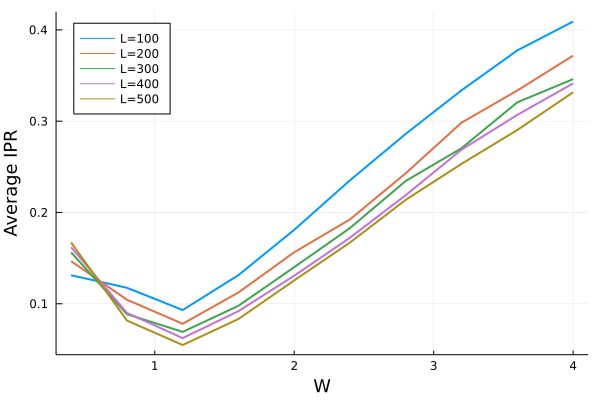

In [8]:
plot(W,IPRA[:,1], label = "L=100",lw=2,xlabel="W",ylabel="Average IPR",fmt = :png,guidefont=font(12),legend=:topleft)
plot!(W,IPRA[:,2], label = "L=200",lw=2)
plot!(W,IPRA[:,3], label = "L=300",lw=2)
plot!(W,IPRA[:,4], label = "L=400",lw=2)
plot!(W,IPRA[:,5], label = "L=500",lw=2)

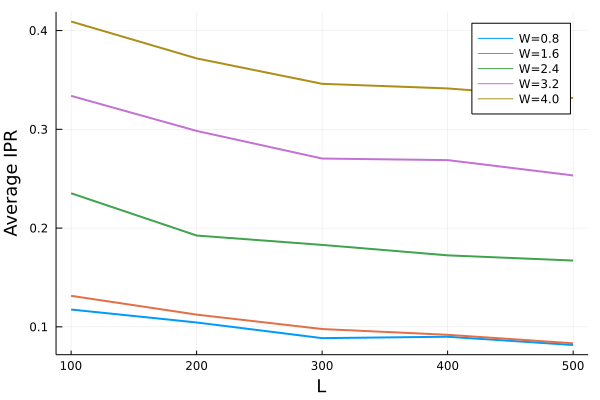

In [12]:
LL=[100,200,300,400,500];
plot(LL,IPRA[2,:], label = "W=0.8",lw=2,xlabel="L",ylabel="Average IPR",fmt = :png,guidefont=font(12),legend=:topright)
plot!(LL,IPRA[4,:], label = "W=1.6",lw=2)
plot!(LL,IPRA[6,:], label = "W=2.4",lw=2)
plot!(LL,IPRA[8,:], label = "W=3.2",lw=2)
plot!(LL,IPRA[10,:], label = "W=4.0",lw=2)